In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题


# def load_data():
#     df_train=pd.read_excel('order_is_cash_2_hz.xlsx')
# #     df_train.drop(['Unnamed: 0'],inplace=True,axis=1)
#     return df_train

df_train=pd.read_excel('order_is_cash_3_hz.xlsx')
df_train['result'] = 0
# df2=pd.read_excel('order_is_cash_3_hz.xlsx')
# df2['result'] = 0
# df_train = df1.append(df2)
print('打印样本数据')

打印样本数据


In [71]:
df_train.drop(['商户号','总笔数','总金额'],axis=1,inplace=True)
df_train.head()


,客单价,用户数,总笔数/用户数,总金额/用户数,近12月有交易的月数,近1月交易天数,近3月交易天数,近6月交易天数,近12月交易天数,近1月交易笔数,...,近12月交易总金额,近1月22:00~04:00的交易总笔数,近1月22:00~04:00的交易总金额,近3月22:00~04:00的交易总笔数,近3月22:00~04:00的交易总金额,近6月22:00~04:00的交易总笔数,近6月22:00~04:00的交易总金额,近12月22:00~04:00的交易总笔数,近12月22:00~04:00的交易总金额,result
0,333.84,9399.0,1.40,467.53,9.0,31.0,92.0,183.0,265.0,1550.0,...,4394291.26,430.0,129770.01,1195.0,365162.12,2322.0,722091.14,3449.0,1059536.14,0
1,1614.29,10472.0,1.20,1943.10,12.0,31.0,92.0,183.0,366.0,939.0,...,20348142.24,21.0,21420.06,80.0,96488.16,135.0,182249.38,324.0,446523.23,0
2,457.21,8843.0,1.10,503.54,12.0,31.0,92.0,177.0,360.0,474.0,...,4452797.59,69.0,17982.00,252.0,78918.00,516.0,179121.01,1410.0,498877.01,0
3,2327.15,8384.0,1.15,2674.11,12.0,31.0,92.0,183.0,366.0,780.0,...,22419747.38,2.0,4522.00,4.0,15888.00,9.0,35569.00,30.0,113226.00,0
4,2020.78,6462.0,1.11,2241.24,12.0,31.0,92.0,183.0,366.0,818.0,...,14482898.45,1.0,8413.00,3.0,8413.22,5.0,17913.22,14.0,30500.22,0


In [72]:
print(df_train.shape)
df_train.info()

(299, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 26 columns):
客单价                      299 non-null float64
用户数                      299 non-null float64
总笔数/用户数                  299 non-null float64
总金额/用户数                  299 non-null float64
近12月有交易的月数               299 non-null float64
近1月交易天数                  299 non-null float64
近3月交易天数                  299 non-null float64
近6月交易天数                  299 non-null float64
近12月交易天数                 299 non-null float64
近1月交易笔数                  299 non-null float64
近1月交易总金额                 299 non-null float64
近3月交易笔数                  299 non-null float64
近3月交易总金额                 299 non-null float64
近6月交易笔数                  299 non-null float64
近6月交易总金额                 299 non-null float64
近12月交易笔数                 299 non-null float64
近12月交易总金额                299 non-null float64
近1月22:00~04:00的交易总笔数     299 non-null float64
近1月22:00~04:00的交易总金额     299 non-null float64
近3月22:00~04

In [73]:
def outlier_check(df,c_name):
    p=df[[c_name]].boxplot(return_type='dict')
#     print(p)
#     print(type(p))
    x_outliers=p['fliers'][0].get_xdata()
#     print(type(x_outliers))
#     print('x_outliers:');print(x_outliers)
    y_outliers = p['fliers'][0].get_ydata()
#     print(type(y_outliers))
#     print('y_outliers:');print(y_outliers)
    for j in range(1):
#         print('j:',j)
        plt.annotate(y_outliers[j], xy=(x_outliers[j], y_outliers[j]), xytext=(x_outliers[j] + 0.02, y_outliers[j]))
    plt.show()  

变量【客单价】的极值图形分布如下


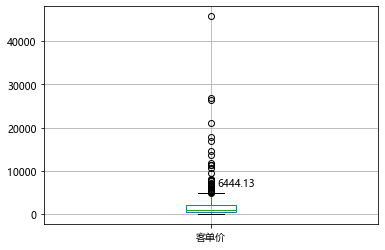

删除变量【客单价20000以上的记录
(286, 26)


In [74]:
print("变量【客单价】的极值图形分布如下")
outlier_check(df_train,'客单价')
print("删除变量【客单价20000以上的记录")
df_train=df_train[df_train['客单价']<10000]
print(df_train.shape)

变量【用户数】的极值图形分布如下


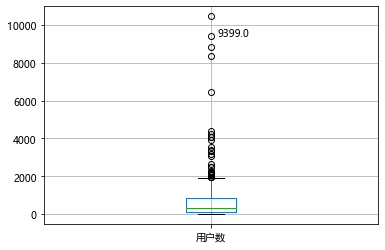

删除变量【用户数】50以上的记录
(271, 26)


In [75]:
print("变量【用户数】的极值图形分布如下")
outlier_check(df_train,'用户数')
print("删除变量【用户数】50以上的记录")
df_train=df_train[df_train['用户数']<3000]
print(df_train.shape)

变量【总笔数/用户数】的极值图形分布如下


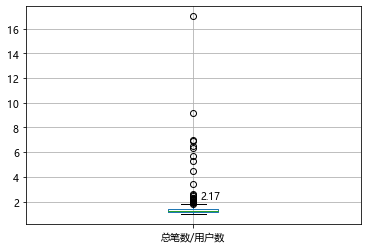

删除变量【总笔数/用户数20以上的记录
(261, 26)


In [76]:
print("变量【总笔数/用户数】的极值图形分布如下")
outlier_check(df_train,'总笔数/用户数')
print("删除变量【总笔数/用户数20以上的记录")
df_train=df_train[df_train['总笔数/用户数']<3]
print(df_train.shape)

变量【总金额/用户数】的极值图形分布如下


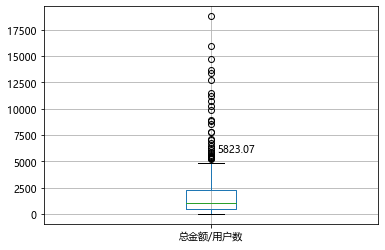

删除变量【总金额/用户数100000以上的记录
(245, 26)


In [77]:
print("变量【总金额/用户数】的极值图形分布如下")
outlier_check(df_train,'总金额/用户数')
print("删除变量【总金额/用户数100000以上的记录")
df_train=df_train[df_train['总金额/用户数']<7500]
print(df_train.shape)

In [78]:
df_train.head()

,客单价,用户数,总笔数/用户数,总金额/用户数,近12月有交易的月数,近1月交易天数,近3月交易天数,近6月交易天数,近12月交易天数,近1月交易笔数,...,近12月交易总金额,近1月22:00~04:00的交易总笔数,近1月22:00~04:00的交易总金额,近3月22:00~04:00的交易总笔数,近3月22:00~04:00的交易总金额,近6月22:00~04:00的交易总笔数,近6月22:00~04:00的交易总金额,近12月22:00~04:00的交易总笔数,近12月22:00~04:00的交易总金额,result
14,4100.15,2494.0,1.42,5823.07,12.0,17.0,78.0,161.0,343.0,135.0,...,14522735.16,121.0,480269.00,621.0,2518533.12,1360.0,5654703.36,3279.0,13677575.02,0
15,81.34,1622.0,2.17,176.41,12.0,31.0,92.0,182.0,365.0,304.0,...,286137.81,11.0,957.70,36.0,2234.70,66.0,3438.50,150.0,8791.60,0
17,621.97,2099.0,1.59,988.22,12.0,31.0,92.0,183.0,366.0,232.0,...,2074269.70,34.0,8878.10,132.0,56747.10,239.0,93058.10,561.0,332301.11,0
18,719.88,2209.0,1.44,1034.36,12.0,31.0,92.0,162.0,338.0,356.0,...,2284912.00,5.0,5640.01,24.0,23200.01,36.0,39455.01,62.0,62900.01,0
19,278.11,2488.0,1.26,349.42,7.0,31.0,92.0,176.0,181.0,585.0,...,869361.84,1.0,239.00,3.0,1848.00,3.0,1848.00,3.0,1848.00,0


In [79]:
# df_train.rename(columns={"近12月有交易的月数":"近12月月数"},inplace=True)
# print("变量【近12月有交易的月数】的极值图形分布如下")
# outlier_check(df_train,'近12月有交易的月数')
# print("删除变量【近12月有交易的月数】100000以上的记录")
# df_train=df_train[df_train['近12月有交易的月数']<100000]
print(df_train.shape)

(245, 26)


In [80]:
print("变量【近1月交易天数】的极值图形分布如下")
# outlier_check(df_train,'近1月交易天数')
# print("删除变量【近1月交易天数】100000以上的记录")
# df_train=df_train[df_train['近1月交易天数']<10]
print(df_train.shape)

变量【近1月交易天数】的极值图形分布如下
(245, 26)


In [81]:
print("变量【近3月交易天数】的极值图形分布如下")
# outlier_check(df_train,'近3月交易天数')
print("删除变量【近3月交易天数】40以上的记录")
# df_train=df_train[df_train['近3月交易天数']<25]
print(df_train.shape)

变量【近3月交易天数】的极值图形分布如下
删除变量【近3月交易天数】40以上的记录
(245, 26)


In [82]:
print("变量【近6月交易天数】的极值图形分布如下")
# outlier_check(df_train,'近6月交易天数')
print("删除变量【近6月交易天数】60以上的记录")
# df_train=df_train[df_train['近6月交易天数']<40]
print(df_train.shape)

变量【近6月交易天数】的极值图形分布如下
删除变量【近6月交易天数】60以上的记录
(245, 26)


In [83]:
print("变量【近12月交易天数】的极值图形分布如下")
# outlier_check(df_train,'近12月交易天数')
print("删除变量【近12月交易天数】80以上的记录")
# df_train=df_train[df_train['近12月交易天数']<50]
print(df_train.shape)

变量【近12月交易天数】的极值图形分布如下
删除变量【近12月交易天数】80以上的记录
(245, 26)


变量【近1月交易笔数】的极值图形分布如下


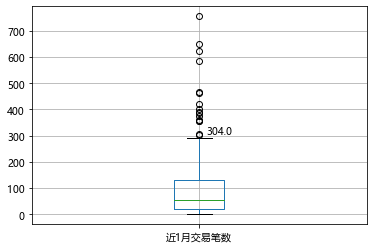

删除变量【近1月交易笔数】25以上的记录
(229, 26)


In [84]:
print("变量【近1月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近1月交易笔数')
print("删除变量【近1月交易笔数】25以上的记录")
df_train=df_train[df_train['近1月交易笔数']<300]
print(df_train.shape)

变量【近3月交易笔数】的极值图形分布如下


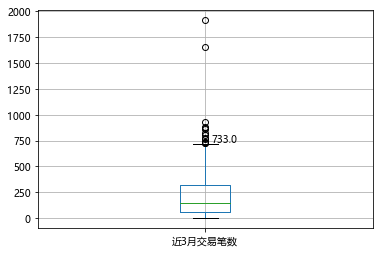

删除变量【近3月交易笔数】80以上的记录
(219, 26)


In [85]:
print("变量【近3月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近3月交易笔数')
print("删除变量【近3月交易笔数】80以上的记录")
df_train=df_train[df_train['近3月交易笔数']<750]
print(df_train.shape)

变量【近6月交易笔数】的极值图形分布如下


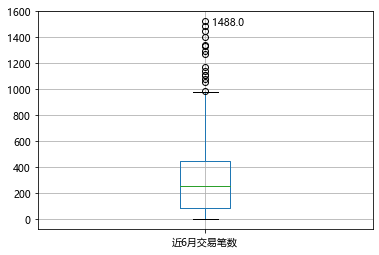

删除变量【近6月交易笔数】120以上的记录
(205, 26)


In [86]:
print("变量【近6月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近6月交易笔数')
print("删除变量【近6月交易笔数】120以上的记录")
df_train=df_train[df_train['近6月交易笔数']<1000]
print(df_train.shape)

变量【近12月交易笔数】的极值图形分布如下


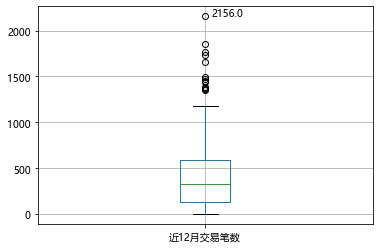

删除变量【近12月交易笔数】120以上的记录
(200, 26)


In [87]:
print("变量【近12月交易笔数】的极值图形分布如下")
outlier_check(df_train,'近12月交易笔数')
print("删除变量【近12月交易笔数】120以上的记录")
df_train=df_train[df_train['近12月交易笔数']<1500]
print(df_train.shape)

变量【近1月交易总金额】的极值图形分布如下


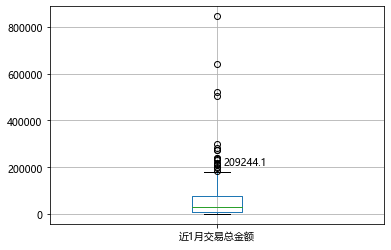

删除变量【近1月交易总金额】120以上的记录
(183, 26)


In [88]:
print("变量【近1月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近1月交易总金额')
print("删除变量【近1月交易总金额】120以上的记录")
df_train=df_train[df_train['近1月交易总金额']<200000]
print(df_train.shape)

变量【近3月交易总金额】的极值图形分布如下


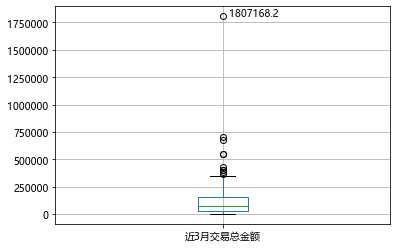

删除变量【近3月交易总金额】120以上的记录
(178, 26)


In [89]:
print("变量【近3月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近3月交易总金额')
print("删除变量【近3月交易总金额】120以上的记录")
df_train=df_train[df_train['近3月交易总金额']<500000]
print(df_train.shape)

变量【近6月交易总金额】的极值图形分布如下


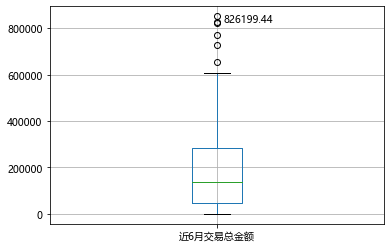

删除变量【近6月交易总金额】120以上的记录
(171, 26)


In [90]:
print("变量【近6月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近6月交易总金额')
print("删除变量【近6月交易总金额】120以上的记录")
df_train=df_train[df_train['近6月交易总金额']<600000]
print(df_train.shape)

变量【近12月交易总金额】的极值图形分布如下


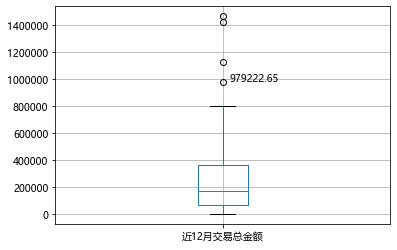

删除变量【近12月交易总金额】120以上的记录
(167, 26)


In [91]:
print("变量【近12月交易总金额】的极值图形分布如下")
outlier_check(df_train,'近12月交易总金额')
print("删除变量【近12月交易总金额】120以上的记录")
df_train=df_train[df_train['近12月交易总金额']<800000]
print(df_train.shape)

变量【近1月22:00~04:00的交易总笔数】的极值图形分布如下


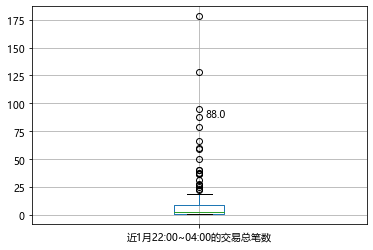

删除变量【近1月22:00~04:00的交易总笔数】120以上的记录
(147, 26)


In [92]:
print("变量【近1月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近1月22:00~04:00的交易总笔数')
print("删除变量【近1月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近1月22:00~04:00的交易总笔数']<25]
print(df_train.shape)

变量【近3月22:00~04:00的交易总笔数】的极值图形分布如下


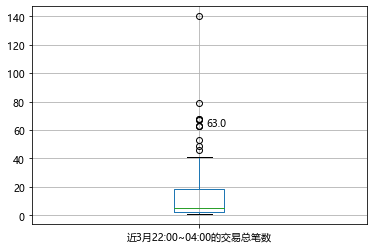

删除变量【近3月22:00~04:00的交易总笔数】120以上的记录
(135, 26)


In [93]:
print("变量【近3月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近3月22:00~04:00的交易总笔数')
print("删除变量【近3月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近3月22:00~04:00的交易总笔数']<40]
print(df_train.shape)

变量【近6月22:00~04:00的交易总笔数】的极值图形分布如下


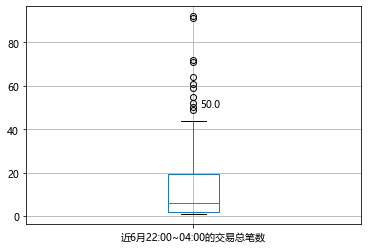

删除变量【近6月22:00~04:00的交易总笔数】120以上的记录
(125, 26)


In [94]:
print("变量【近6月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近6月22:00~04:00的交易总笔数')
print("删除变量【近6月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近6月22:00~04:00的交易总笔数']<50]
print(df_train.shape)

变量【近12月22:00~04:00的交易总笔数】的极值图形分布如下


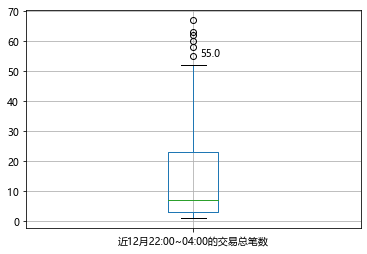

删除变量【近12月22:00~04:00的交易总笔数】120以上的记录
(119, 26)


In [95]:
print("变量【近12月22:00~04:00的交易总笔数】的极值图形分布如下")
outlier_check(df_train,'近12月22:00~04:00的交易总笔数')
print("删除变量【近12月22:00~04:00的交易总笔数】120以上的记录")
df_train=df_train[df_train['近12月22:00~04:00的交易总笔数']<53]
print(df_train.shape)

变量【近1月22:00~04:00的交易总金额】的极值图形分布如下


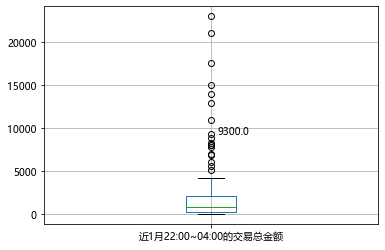

删除变量【近1月22:00~04:00的交易总金额】120以上的记录
(112, 26)


In [102]:
print("变量【近1月22:00~04:00的交易总金额】的极值图形分布如下")
outlier_check(df_train,'近1月22:00~04:00的交易总金额')
print("删除变量【近1月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近1月22:00~04:00的交易总金额']<10000]
print(df_train.shape)

变量【近3月22:00~04:00的交易总金额】的极值图形分布如下


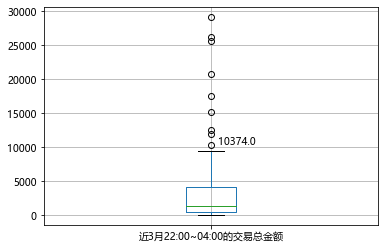

删除变量【近3月22:00~04:00的交易总金额】120以上的记录
(103, 26)


In [104]:
print("变量【近3月22:00~04:00的交易总金额】的极值图形分布如下")
outlier_check(df_train,'近3月22:00~04:00的交易总金额')
print("删除变量【近3月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近3月22:00~04:00的交易总金额']<10000]
print(df_train.shape)

变量【近6月22:00~04:00的交易总金额】的极值图形分布如下


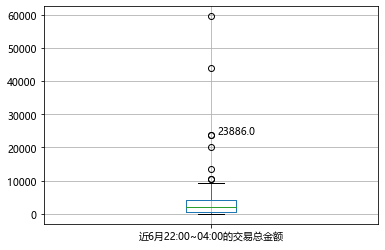

删除变量【近6月22:00~04:00的交易总金额】120以上的记录
(95, 26)


In [106]:
print("变量【近6月22:00~04:00的交易总金额】的极值图形分布如下")
outlier_check(df_train,'近6月22:00~04:00的交易总金额')
print("删除变量【近6月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近6月22:00~04:00的交易总金额']<10000]
print(df_train.shape)

变量【近12月22:00~04:00的交易总金额】的极值图形分布如下


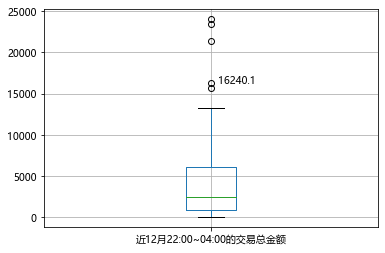

删除变量【近12月22:00~04:00的交易总金额】120以上的记录
(90, 26)


In [109]:
print("变量【近12月22:00~04:00的交易总金额】的极值图形分布如下")
outlier_check(df_train,'近12月22:00~04:00的交易总金额')
print("删除变量【近12月22:00~04:00的交易总金额】120以上的记录")
df_train=df_train[df_train['近12月22:00~04:00的交易总金额']<15000]
print(df_train.shape)

In [100]:
df_train

,客单价,用户数,总笔数/用户数,总金额/用户数,近12月有交易的月数,近1月交易天数,近3月交易天数,近6月交易天数,近12月交易天数,近1月交易笔数,...,近12月交易总金额,近1月22:00~04:00的交易总笔数,近1月22:00~04:00的交易总金额,近3月22:00~04:00的交易总笔数,近3月22:00~04:00的交易总金额,近6月22:00~04:00的交易总笔数,近6月22:00~04:00的交易总金额,近12月22:00~04:00的交易总笔数,近12月22:00~04:00的交易总金额,result
52,305.78,1271.0,1.14,349.09,12.0,30.0,90.0,168.0,336.0,149.0,...,443687.21,6.0,1769.00,18.0,10374.00,25.0,12752.00,52.0,20360.00,0
74,790.69,778.0,1.24,981.76,12.0,31.0,83.0,137.0,303.0,115.0,...,763809.03,1.0,170.00,1.0,170.00,2.0,1910.00,2.0,1910.00,0
77,594.15,799.0,1.17,693.80,12.0,21.0,66.0,144.0,271.0,71.0,...,554342.77,2.0,9300.00,6.0,12576.00,7.0,27376.00,10.0,37575.00,0
81,98.85,810.0,1.07,106.05,12.0,5.0,47.0,130.0,246.0,8.0,...,85898.16,1.0,98.00,7.0,503.01,32.0,3639.01,39.0,4101.01,0
83,353.27,457.0,1.84,650.88,12.0,29.0,84.0,161.0,312.0,83.0,...,297451.07,3.0,439.00,3.0,439.00,3.0,439.00,11.0,3726.00,0
88,741.70,446.0,1.79,1328.74,12.0,26.0,76.0,149.0,305.0,70.0,...,592619.30,5.0,1587.00,11.0,6779.00,21.0,9158.50,44.0,16240.10,0
95,513.49,614.0,1.17,599.63,6.0,29.0,88.0,173.0,173.0,121.0,...,368172.01,8.0,3834.00,10.0,5448.00,15.0,8156.00,15.0,8156.00,0
97,1142.50,583.0,1.14,1303.19,10.0,14.0,56.0,114.0,209.0,19.0,...,759761.46,2.0,345.00,12.0,1887.00,14.0,2097.00,47.0,24036.00,0
103,1138.00,424.0,1.44,1639.90,11.0,24.0,76.0,128.0,278.0,68.0,...,695317.56,2.0,1820.00,7.0,8095.01,8.0,8895.01,21.0,21344.01,0
104,604.85,424.0,1.41,854.49,10.0,22.0,76.0,156.0,255.0,50.0,...,362304.93,3.0,988.00,9.0,2280.00,17.0,5600.00,21.0,6528.00,0


In [110]:
df_train.to_excel('order_is_cash_3_hz_new.xlsx',index=False)